<a href="https://colab.research.google.com/github/ramyars466/restuarant_rating/blob/main/RestuarantRating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost lightgbm shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


In [5]:
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
# Fill missing cuisines
df['Cuisines'].fillna("Unknown", inplace=True)

In [8]:
df.drop(['Restaurant ID','Restaurant Name','Address',
         'Locality','Locality Verbose',
         'Rating color','Rating text'],
        axis=1, inplace=True)

In [9]:
df['Cuisine_count'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')))

In [10]:
yes_no_cols = ['Has Table booking','Has Online delivery',
               'Is delivering now','Switch to order menu']

for col in yes_no_cols:
    df[col] = df[col].map({'Yes':1,'No':0})

In [11]:
df['Cost_per_person'] = df['Average Cost for two'] / 2

In [12]:
df['Votes_per_cost'] = df['Votes'] / (df['Average Cost for two'] + 1)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [14]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)

print("Linear Regression Results")
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R2 Score:", r2_score(y_test, lr_preds))

Linear Regression Results
MSE: 1.5588077752187144
R2 Score: 0.31514361489044396


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)

print("Random Forest Results")
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R2 Score:", r2_score(y_test, rf_preds))

Random Forest Results
MSE: 0.08671863160648881
R2 Score: 0.9619004924739137


In [18]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)

print("XGBoost Results")
print("MSE:", mean_squared_error(y_test, xgb_preds))
print("R2 Score:", r2_score(y_test, xgb_preds))

XGBoost Results
MSE: 0.0833622000311896
R2 Score: 0.9633751281743961


In [19]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=300, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42))
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

stack.fit(X_train, y_train)

stack_preds = stack.predict(X_test)

print("Stacking Model Results")
print("MSE:", mean_squared_error(y_test, stack_preds))
print("R2 Score:", r2_score(y_test, stack_preds))

Stacking Model Results
MSE: 0.08201922310650568
R2 Score: 0.9639651600798986


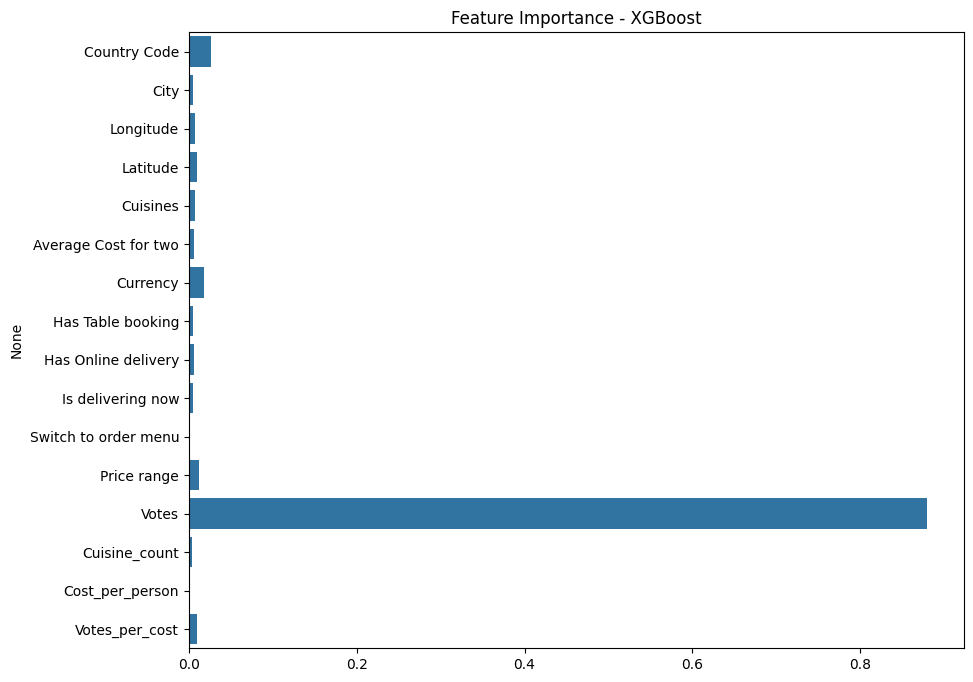

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = xgb.feature_importances_
features = X.columns

plt.figure(figsize=(10,8))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - XGBoost")
plt.show()

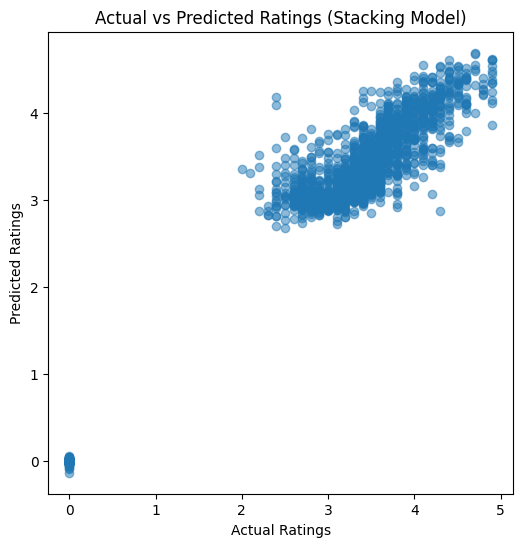

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, stack_preds, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Stacking Model)")
plt.show()

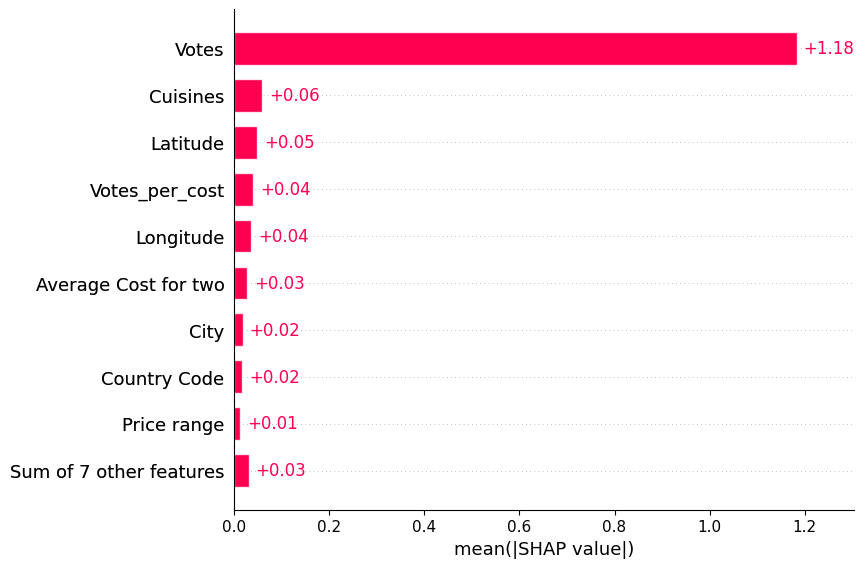

In [22]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.plots.bar(shap_values)

In [24]:
original_df = pd.read_csv("Dataset .csv")  # use correct filename

In [26]:
submission = pd.DataFrame({
    "Restaurant ID": original_df.loc[X_test.index, "Restaurant ID"],
    "Predicted Aggregate Rating": stack_preds
})

submission.head()

,Restaurant ID,Predicted Aggregate Rating
4731,3918,3.315554
1468,18408054,3.409552
9037,309693,2.993887
7866,18157386,3.866358
5570,18396163,3.100079


In [27]:
submission["Predicted Aggregate Rating"] = submission["Predicted Aggregate Rating"].round(2)

In [28]:
submission.to_csv("submission.csv", index=False)

In [29]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>